In [106]:
import numpy as np
import matplotlib.pyplot as plt 

In [107]:
var('theta, theta_i, L, theta_d, theta_r')
theta_i_val = 45/180*np.pi
theta_d_val = (67.5-45)/180*np.pi
theta_r_val = 45/180*np.pi
L_val = 20

In [108]:
y1(theta) = L*((theta/theta_i) - 1/(2*np.pi)*sin(2*np.pi*theta/theta_i))
pretty_print(y1) # rise 

theta |--> L*(theta/theta_i - 0.15915494309189535*sin(6.283185307179586*theta/theta_i))

In [109]:
y2(theta) = L # dwell 1

In [110]:
y3(theta) = L*(1-(theta-theta_i-theta_d)/theta_r + 1/(2*np.pi)*sin(2*np.pi*((theta-theta_i-theta_d)/theta_r)))
pretty_print(y3)

theta |--> -L*((theta - theta_d - theta_i)/theta_r - 0.15915494309189535*sin(6.283185307179586*(theta - theta_d - theta_i)/theta_r) - 1)

In [111]:
y4(theta) = 0

In [112]:
theta_range = np.linspace(0,2*np.pi,100)
y_val = []

for theta_val in theta_range:
    if (theta_val < theta_i_val):
        y_val.append(y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        y_val.append(y2(theta).subs(L = L_val))
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        y_val.append(y3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))
    else:
        y_val.append(y4(theta))

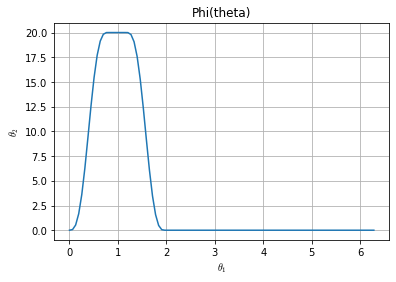

In [113]:
plt.plot(theta_range,y_val)
plt.grid()
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Phi(theta)');

In [114]:
v1(theta) = y1(theta).diff(theta)
v2(theta) = y2(theta).diff(theta)
v3(theta) = y3(theta).diff(theta)
v4(theta) = y4(theta).diff(theta)

pretty_print(v1)
pretty_print(v3)

theta |--> L*(-1.0*cos(6.283185307179586*theta/theta_i)/theta_i + 1/theta_i)

theta |--> -L*(-1.0*cos(6.283185307179586*(theta - theta_d - theta_i)/theta_r)/theta_r + 1/theta_r)

In [115]:
v_val = []

for theta_val in theta_range:
    if (theta_val < theta_i_val):
        v_val.append(v1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        v_val.append(v2(theta).subs(L = L_val))
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        v_val.append(v3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))
    else:
        v_val.append(v4(theta))

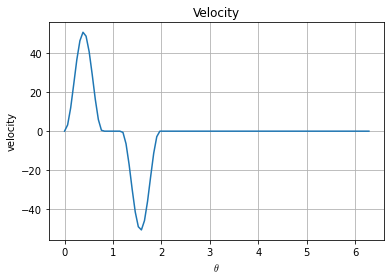

In [116]:
plt.plot(theta_range,v_val)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('velocity')
plt.title('Velocity');

In [117]:
find_local_maximum(v1(theta).subs(L = L_val, theta_i = theta_i_val),0,theta_i_val)

(50.92958178940651, 0.3926990816987242)

In [118]:
find_root(v1(theta).subs(L = L_val, theta_i = theta_i_val).diff(theta),0.1,theta_i_val)

0.39269908169872886

In [119]:
a1(theta) = v1(theta).diff(theta)
a2(theta) = v2(theta).diff(theta)
a3(theta) = v3(theta).diff(theta)
a4(theta) = v4(theta).diff(theta)

pretty_print(a1)
pretty_print(a3)

theta |--> 6.283185307179586*L*sin(6.283185307179586*theta/theta_i)/theta_i^2

theta |--> -6.283185307179586*L*sin(6.283185307179586*(theta - theta_d - theta_i)/theta_r)/theta_r^2

In [120]:
a_val = []

for theta_val in theta_range:
    if (theta_val < theta_i_val):
        a_val.append(a1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        a_val.append(a2(theta).subs(L = L_val))
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        a_val.append(a3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))
    else:
        a_val.append(a4(theta))

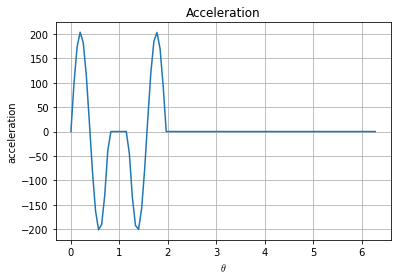

In [121]:
plt.plot(theta_range,a_val)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('acceleration')
plt.title('Acceleration');

In [122]:
find_local_maximum(a1(theta).subs(L = L_val, theta_i = theta_i_val),0,theta_i_val)

(203.71832715762605, 0.19634954070591074)

In [123]:
find_root(a1(theta).subs(L = L_val, theta_i = theta_i_val).diff(theta),0,theta_i_val)

0.5890486225480862

In [147]:
Rp = 50  # Pitch circle radius
Xp_val = []
Yp_val = []
for theta_val in theta_range:
    if (theta_val < theta_i_val):
        Xp_val.append((Rp + y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))*sin(theta_val))
        Yp_val.append((Rp + y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))*cos(theta_val))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        Xp_val.append((Rp + y2(theta).subs(L = L_val))*sin(theta_val))
        Yp_val.append((Rp+y2(theta).subs(L = L_val))*cos(theta_val))
        
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        Xp_val.append((Rp + y3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))*sin(theta_val))
        Yp_val.append((Rp + y3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))*cos(theta_val))
        
    else:
        Xp_val.append((Rp+y4(theta))*sin(theta_val))
        Yp_val.append((Rp + y4(theta))*cos(theta_val))                     

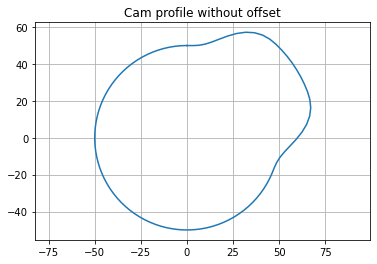

In [159]:
plt.plot(Xp_val,Yp_val)
plt.grid()
plt.axis('equal')
plt.title('Pitch curve without offset');


In [149]:
e = 10 #offset
d = sqrt(Rp**2 + e**2)

In [152]:
Rp = 50  # Pitch circle radius
Xp_val_off = []
Yp_val_off = []
for theta_val in theta_range:
    if (theta_val < theta_i_val):
        Xp_val_off.append( e*cos(theta_val) + (Rp + y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))*sin(theta_val))
        Yp_val_off.append(-e*sin(theta_val) + (Rp + y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val))*cos(theta_val))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        Xp_val_off.append(e*cos(theta_val) + (Rp + y2(theta).subs(L = L_val))*sin(theta_val))
        Yp_val_off.append(-e*sin(theta_val) + (Rp+y2(theta).subs(L = L_val))*cos(theta_val))
        
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        Xp_val_off.append(e*cos(theta_val) + (Rp + y3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))*sin(theta_val))
        Yp_val_off.append(-e*sin(theta_val) + (Rp + y3(theta).subs(L = L_val, theta = theta_val, theta_i = theta_i_val, theta_d = theta_d_val, theta_r = theta_r_val))*cos(theta_val))
        
    else:
        Xp_val_off.append(e*cos(theta_val) + (Rp+y4(theta))*sin(theta_val))
        Yp_val_off.append(-e*sin(theta_val) + (Rp + y4(theta))*cos(theta_val))                     

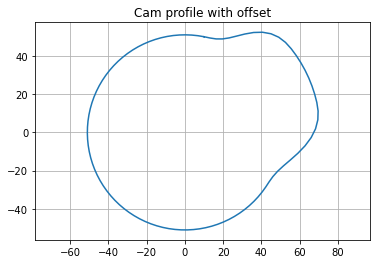

In [158]:
plt.plot(Xp_val_off,Yp_val_off)
plt.grid()
plt.axis('equal')
plt.title('Pitch curve with offset');

In [160]:
phi_val = []

for theta_val in theta_range:
    if (theta_val < theta_i_val):
        phi_val.append(arctan2(v1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val),Rp + y1(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val)))
    
    elif (theta_val < theta_i_val + theta_d_val) :
        phi_val.append(arctan2(v2(theta).subs(L = L_val),Rp + y2(theta).subs(L = L_val)))
    elif (theta_val < theta_i_val + theta_d_val + theta_r_val) :
        phi_val.append(arctan2(v3(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val, theta_d = theta_d_val, theta_r = theta_r_val),Rp + y3(theta).subs(L = L_val, theta_i = theta_i_val, theta = theta_val, theta_d = theta_d_val, theta_r = theta_r_val)))
    else:
        phi_val.append(arctan2(v4(theta),Rp + y4(theta)))

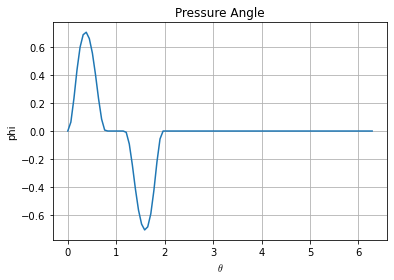

In [162]:
plt.plot(theta_range,phi_val)
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('phi')
plt.title('Pressure Angle');